In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df_train = pd.read_csv('fashion-mnist_train.csv')
df_test = pd.read_csv('fashion-mnist_test.csv')

In [3]:
X_train = df_train.drop(columns='label').to_numpy()
y_train = df_train['label'].to_numpy()
X_test = df_test.drop(columns='label').to_numpy()
y_test = df_test['label'].to_numpy()

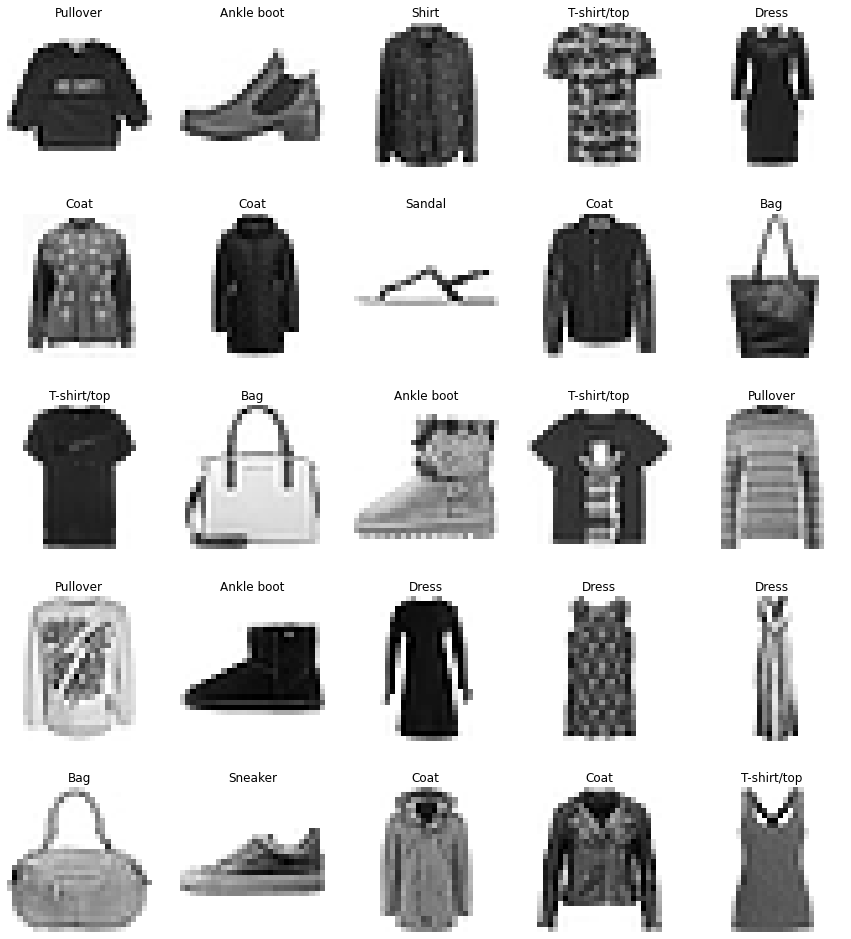

In [4]:
classes = ['T-shirt/top', 'Trouser', 'Pullover',
           'Dress', 'Coat', 'Sandal', 'Shirt',
           'Sneaker', 'Bag', 'Ankle boot']

fig, ax = plt.subplots(5, 5, figsize=(15, 17))

for i in range(5):
    for j in range(5):
        image = X_train[i * 5 + j]
        label = y_train[i * 5 + j]
        ax[i][j].imshow(image.reshape(28, 28),
                        cmap='binary')
        ax[i][j].set_title(classes[label])
        ax[i][j].axis('off')

plt.show()

In [5]:
knn_test = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 7],
             'weights': ['uniform', 'distance']}
test_knn_gscv = GridSearchCV(knn_test, param_grid, cv=3, n_jobs=-1, verbose=2)
test_knn_gscv.fit(X_train, y_train)
test_knn_gscv.best_params_

Fitting 3 folds for each of 4 candidates, totalling 12 fits


{'n_neighbors': 7, 'weights': 'distance'}

In [10]:
dtc_test = DecisionTreeClassifier()
params_grid = {
    'max_depth': [8],
    'criterion': ['entropy'],
    'min_samples_split': [1, 8],
    'min_samples_leaf': [2, 4]
}
test_dtc_gscv = GridSearchCV(dtc_test, params_grid, cv=3, n_jobs=-1, verbose=2)
test_dtc_gscv.fit(X_train, y_train)
test_dtc_gscv.best_params_
Fitting 3 folds for each of 4 candidates, totalling

Fitting 3 folds for each of 4 candidates, totalling 12 fits


/home/yann/.local/lib/python3.9/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [   nan 0.793     nan 0.7933]
  warnings.warn(


{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 4,
 'min_samples_split': 8}

In [17]:
knn_model = KNeighborsClassifier(n_neighbors=7, weights='distance')
dtc_model = DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=4, min_samples_split=8)

In [19]:
for model in (knn_model, dtc_model):
    pipe = make_pipeline(StandardScaler(), model)
    y_pred_model = cross_val_predict(pipe, X_train, y_train,
                                  cv=3, n_jobs=-1, verbose=2)
    print(classification_report(y_train, y_pred_model, digits=4, target_names=classes))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.5min finished


              precision    recall  f1-score   support

 T-shirt/top     0.7845    0.8580    0.8196      6000
     Trouser     0.9919    0.9617    0.9766      6000
    Pullover     0.7671    0.7773    0.7722      6000
       Dress     0.8901    0.8710    0.8805      6000
        Coat     0.7587    0.7743    0.7664      6000
      Sandal     0.9912    0.8235    0.8996      6000
       Shirt     0.6296    0.6085    0.6189      6000
     Sneaker     0.8663    0.9483    0.9055      6000
         Bag     0.9775    0.9347    0.9556      6000
  Ankle boot     0.8944    0.9625    0.9272      6000

    accuracy                         0.8520     60000
   macro avg     0.8551    0.8520    0.8522     60000
weighted avg     0.8551    0.8520    0.8522     60000



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   17.3s finished


              precision    recall  f1-score   support

 T-shirt/top     0.7440    0.7717    0.7576      6000
     Trouser     0.9404    0.9488    0.9446      6000
    Pullover     0.6881    0.7000    0.6940      6000
       Dress     0.8190    0.8100    0.8145      6000
        Coat     0.6824    0.7015    0.6918      6000
      Sandal     0.9047    0.9045    0.9046      6000
       Shirt     0.5729    0.5380    0.5549      6000
     Sneaker     0.8694    0.8890    0.8791      6000
         Bag     0.9336    0.9088    0.9210      6000
  Ankle boot     0.9093    0.8953    0.9023      6000

    accuracy                         0.8068     60000
   macro avg     0.8064    0.8068    0.8064     60000
weighted avg     0.8064    0.8068    0.8064     60000



In [24]:
voting_model = VotingClassifier(estimators=[('knn', knn_model), ('dtc', dtc_model)])
voting_pipe = make_pipeline(StandardScaler(), voting_model)
y_pred_voting = cross_val_predict(voting_pipe, X_train, y_train,
                                  cv=5, n_jobs=-1, verbose=2)
print(classification_report(y_train, y_pred_voting, digits=4, target_names=classes))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.6min remaining:  2.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.6min finished


              precision    recall  f1-score   support

 T-shirt/top     0.7065    0.9138    0.7969      6000
     Trouser     0.9521    0.9703    0.9611      6000
    Pullover     0.6707    0.8492    0.7495      6000
       Dress     0.8497    0.8412    0.8454      6000
        Coat     0.7353    0.7025    0.7185      6000
      Sandal     0.9059    0.9407    0.9230      6000
       Shirt     0.7646    0.4347    0.5542      6000
     Sneaker     0.8890    0.9208    0.9046      6000
         Bag     0.9882    0.8895    0.9362      6000
  Ankle boot     0.9600    0.8958    0.9268      6000

    accuracy                         0.8358     60000
   macro avg     0.8422    0.8359    0.8316     60000
weighted avg     0.8422    0.8358    0.8316     60000



In [ ]:
voting_pipe.fit(X_train, y_train)
y_pred = voting_pipe.predict(X_test)
print(classification_report(y_test, y_pred, digits=4, target_names=classes))